#データ読み込み

In [1]:
# 問題1
import pandas as pd
import numpy as np

# 次に，データを読む．urlを直接入れてWeb経由でも読むことができる．
# ここでは UCI機械学習レポジトリ https://archive.ics.uci.edu/ml/ からiris（あやめ）のデータを直接読んでみる．
# ブラウザでurl http://logopt.com/data/iris.data/ をみてデータを確認すると，列の名前（ヘッダー）がついておらず、データだけがカンマ区切りで並んでいるようだ．

# これはcsv (comma-separated valueの略）ファイルと呼ばれるタイプのテキストファイルなので，read_csv関数で読むことができる．
# 返値はデータを表形式で保管するデータ構造であるデータフレームである．（ここでは df という名前の変数に保管しておく．）
# ついでに列名をnames引数で指定してあげよう．これは列名を表す文字列のリストとして与える． 
# データは順に「'がく片長','がく片幅','花びら長','花びら幅', '種類'」である．

iris = pd.read_csv('http://logopt.com/data/iris.data', names=['がく片長','がく片幅','花びら長','花びら幅', '種類'])
iris.head() # => 返値はデータを表形式で保管するデータ構造であるデータフレーム

,がく片長,がく片幅,花びら長,花びら幅,種類
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# もう１つの例題としてUFOの目撃情報のデータを読み込んでみよう。データはhttp://logopt.com/data/ufo.csv にある。
# このデータはヘッダーが付いているので、namesで列名を指定せずに読み込むことができる。
# ただし、最初の列が抜けているので、Unnamed:0 と表示される。

ufo = pd.read_csv('http://logopt.com/data/ufo.csv')
ufo.head()

,Unnamed: 0,City,Colors Reported,Shape Reported,State,Time
0,0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [3]:
# 問題2（ビデオゲーム）
# ビデオゲームのセールスデータを http://logopt.com/data/vgsales.csv から読みこみ、データフレームに保管せよ。ただし、このデータにはヘッダーが付いている。
video_game = pd.read_csv("http://logopt.com/data/vgsales.csv")
video_game.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# 問題3（車）
# 車の燃費に関するデータセットから，Auto MPGデータを読み込んで，carという名前でデータフレームに保管せよ．
# 元データはこちらに格納されている．
# http://logopt.com/data/auto-mpg.data

# データを確認してみると，このデータはカンマ(,)区切り（これがread_csv関数の既定値）ではなく，空白で区切られている．
# このような場合には，read_csvの引数の delim_whitespace をTrueに設定しておく必要がある．
# 列名は https://archive.ics.uci.edu/ml/datasets/Auto+MPG で解説されているが，必要ならば以下のリストを用いて，列名を設定して読み込め．

L = ['mpg', 'cylinders', 'displacement', 'horsepower','weight', 'acceleration','year','origin', 'name']
# さらに，最初と最後の5つのデータを表示させて確認せよ．

Auto = pd.read_csv("http://logopt.com/data/auto-mpg.data",delim_whitespace=True,names=['mpg', 'cylinders', 'displacement', 'horsepower','weight', 'acceleration','year','origin', 'name'])
print(Auto.head())
print(Auto.tail())

    mpg  cylinders  displacement  ... year  origin                       name
0  18.0          8         307.0  ...   70       1  chevrolet chevelle malibu
1  15.0          8         350.0  ...   70       1          buick skylark 320
2  18.0          8         318.0  ...   70       1         plymouth satellite
3  16.0          8         304.0  ...   70       1              amc rebel sst
4  17.0          8         302.0  ...   70       1                ford torino

[5 rows x 9 columns]
      mpg  cylinders  displacement  ... year  origin             name
393  27.0          4         140.0  ...   82       1  ford mustang gl
394  44.0          4          97.0  ...   82       2        vw pickup
395  32.0          4         135.0  ...   82       1    dodge rampage
396  28.0          4         120.0  ...   82       1      ford ranger
397  31.0          4         119.0  ...   82       1       chevy s-10

[5 rows x 9 columns]


#データフレームの属性

In [5]:
# pandasのデータフレームは，Excelの表のようなものなので，行と列でアクセスできる．
# 行に付加されたラベルをインデックス(index)とよぶ．一番左端 0,1,2,3… と表示されている太字の列がインデックスである． 
# これはindex属性でアクセスできる．

df = pd.read_csv('http://logopt.com/data/iris.data', names=['がく片長','がく片幅','花びら長','花びら幅', '種類'])
print(df.index) #インデックスは0から149までの整数であることが表示される． 
print(df.head())

RangeIndex(start=0, stop=150, step=1)
   がく片長  がく片幅  花びら長  花びら幅           種類
0   5.1   3.5   1.4   0.2  Iris-setosa
1   4.9   3.0   1.4   0.2  Iris-setosa
2   4.7   3.2   1.3   0.2  Iris-setosa
3   4.6   3.1   1.5   0.2  Iris-setosa
4   5.0   3.6   1.4   0.2  Iris-setosa


In [6]:
# インデックスとなる列を指定しないと、上のように0から始める整数が自動的に付加される。
# インデックス列を指定するには、read_csvを用いてデータを読み込む際に、index_col引数で指定することができる。

# 列の番号もしくは列名を与えることによって、指定した列がインデックスになる。
# UFOの目撃情報のデータで最初の列（0番目の列）をインデックスとして指定して読み込んでみる。

ufo = pd.read_csv('http://logopt.com/data/ufo.csv', index_col=0) #column
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [7]:
# 列の名前は，番上に表示されている太字の行であり，これはcolumns属性でアクセスできる．
ufo.columns

Index(['City', 'Colors Reported', 'Shape Reported', 'State', 'Time'], dtype='object')

In [8]:
# データ自身は，データフレームのvalues属性に保管されている．これはNumPyの多次元配列(ndarray)である(type関数を用いて確認してみる）． 
# したがって，データの最初の行を表示させるには，df.values[0]とすればよい． 0行4列目（最初のアヤメの名前）を表示させるには，df.values[0,4]（もしくは df.values[0][4]）とすればよい．

print(type(df.values)) #values属性はNumPyのn次元配列である．
df.values[0,4] #0行4列目の要素は 'Iris-sentosa'である．

<class 'numpy.ndarray'>


'Iris-setosa'

In [9]:
# データの概要を知るためのメソッドがdescribe()である．（メソッドなので関数と同じように最後に ()を付けるのを忘れずに．）

df.describe() #count（データ数），mean（平均），std（標準偏差），min（最小値）など

,がく片長,がく片幅,花びら長,花びら幅
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# 問題5
# 車の燃費データに対して，アヤメのデータと同じように，インデックス，列の名前とデータの概要を表示せよ．
# さらに，その情報を用いて燃費(MPG: Mile Per Gallon)の平均と標準偏差を答えよ．

Auto = pd.read_csv("http://logopt.com/data/auto-mpg.data",delim_whitespace=True,names=['mpg', 'cylinders', 'displacement', 'horsepower','weight', 'acceleration','year','origin', 'name'])
print(Auto.index)
print(Auto.columns)
print(Auto.describe())

RangeIndex(start=0, stop=398, step=1)
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')
              mpg   cylinders  ...        year      origin
count  398.000000  398.000000  ...  398.000000  398.000000
mean    23.514573    5.454774  ...   76.010050    1.572864
std      7.815984    1.701004  ...    3.697627    0.802055
min      9.000000    3.000000  ...   70.000000    1.000000
25%     17.500000    4.000000  ...   73.000000    1.000000
50%     23.000000    4.000000  ...   76.000000    1.000000
75%     29.000000    8.000000  ...   79.000000    2.000000
max     46.600000    8.000000  ...   82.000000    3.000000

[8 rows x 7 columns]


#列へのアクセス

In [11]:
# 列は辞書と同じようにアクセスできる．
# たとえば，'がく片幅'と名付けられた列を切り出すには，df['がく片幅'] とすればよい．
# この記法の短縮版として，データフレームの属性としてアクセスする方法もある．
# たとえば，

df['がく片幅']

# とすると同じ結果が返される．

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: がく片幅, Length: 150, dtype: float64

In [12]:
# 切り出された列はシリーズ(series)とよばれ，NumPyの配列と同じような性質をもつ．
# たとえば，'がく片長'と名付けられた列のi番目からj-1番目までを切り出したい場合には，

# df['がく片長'][i:j]

# とすればよい．

print(df['がく片長'][3:10])  #列名が'がく片長'の列の3~9個のデータから成るシリーズ（series：インデックスとデータの組）
print(df.がく片長[:3])

3    4.6
4    5.0
5    5.4
6    4.6
7    5.0
8    4.4
9    4.9
Name: がく片長, dtype: float64
0    5.1
1    4.9
2    4.7
Name: がく片長, dtype: float64


In [13]:
# 行の切り出しはインデックスで切り出す．
# たとえば，1行目から3行目までの行を切り出すには，以下のようにする．

df[1:4]

,がく片長,がく片幅,花びら長,花びら幅,種類
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


#行列の要素（Excelのセルに相当）へのアクセス

In [14]:
# 行と列を指定して要素を抽出するには，ilocもしくはloc属性を用いる．
# 文法はいずれも同じで，以下の通り．

# df.iloc[行の切り出し,列の切り出し] - 番号(index)でのアクセス : 例,df.iloc[1,3] - 1行３列目のデータを持ってくる
# df.loc[行の切り出し,列の切り出し] - ラベルを(名前)用いたアクセス : 例,df.loc["A","B"] - A(名前)行B(名前)列目のデータを持ってくる

# 行と列はラベルもしくは番号でアクセスできる．

# ラベルとは，行に対してはインデックス，列に対しては列名を指す．
# ilocは番号によるアクセスを行う．

# 切り出しは，リストと同様に，番号 i:j とすると i番目からj−1番目までが抽出される．
# locはラベルによるアクセスを行う．

# 切り出しは，リストやilocと異なり，境界も含んだものになる．すなわち，i:j とするとラベル iからラベル j までが抽出される．
# 切り出しを行うかわりに，抽出したい列名のリストを用いて，['がく片長', '花びら幅']などと切り出しをしてもよい．

# 通常のスライシングと同様に，すべての行もしくは列を抽出したい場合には，: と記述すればよい．
# たとえば，1列目から2列目までから成るデータフレームを切り出すには，

# df.iloc[:,1:3]
# とすればよい．

df.iloc[1:5,1:4] #1行目から4行目まで，1列目から3列目までを抽出

,がく片幅,花びら長,花びら幅
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2


In [15]:
df.loc[1:5,'がく片長':'花びら幅'] #行をインデックスで，列を列名で指定（最後が含まれることに注意！）

,がく片長,がく片幅,花びら長,花びら幅
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4


In [16]:
df.loc[1:5,['がく片長','花びら幅']]  #列をリストで指定

,がく片長,花びら幅
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
5,5.4,0.4


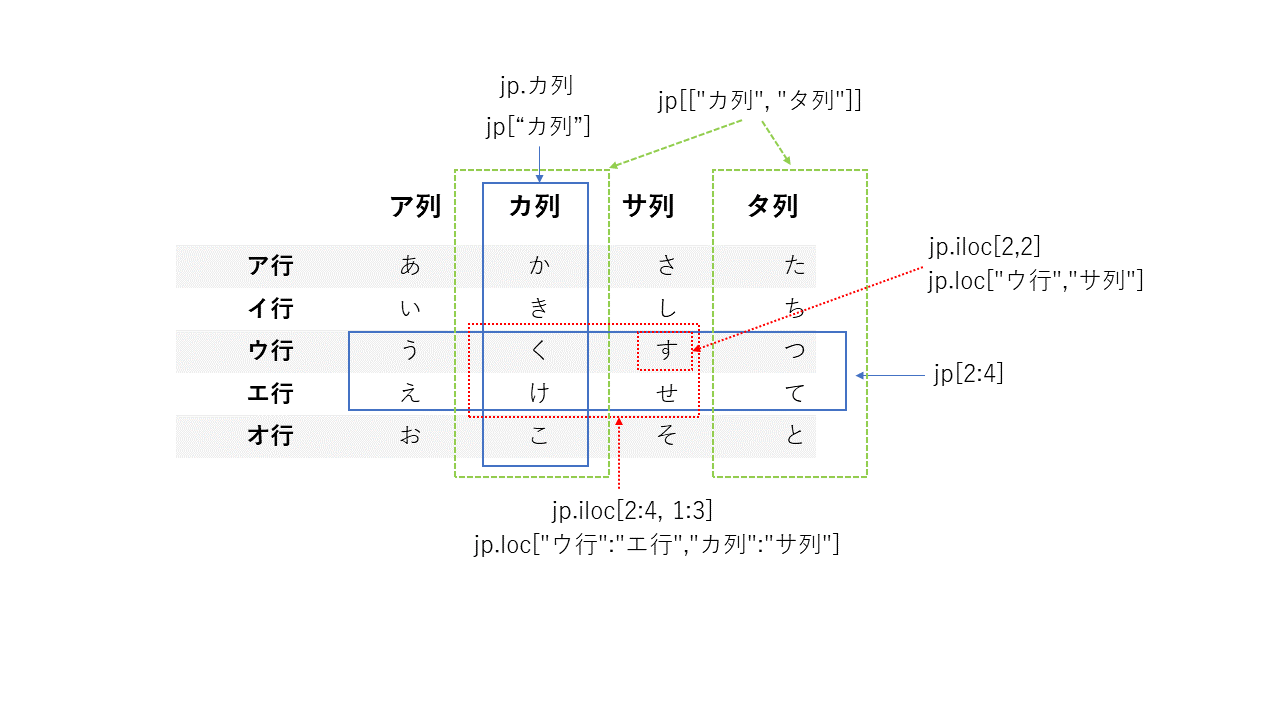

In [17]:
jp = pd.read_csv("http://logopt.com/data/50on.csv", index_col=0)
jp

,ア列,カ列,サ列,タ列
ア行,あ,か,さ,た
イ行,い,き,し,ち
ウ行,う,く,す,つ
エ行,え,け,せ,て
オ行,お,こ,そ,と


In [18]:
# 行は番号のスライシングで切り出すことができる．
jp[2:4]

,ア列,カ列,サ列,タ列
ウ行,う,く,す,つ
エ行,え,け,せ,て


In [19]:
# 列はラベルでアクセスできる．
jp["カ列"]

ア行    か
イ行    き
ウ行    く
エ行    け
オ行    こ
Name: カ列, dtype: object

In [20]:
# ラベルのリストを与えることによって複数の列を切り出せる．
jp[["カ列", "タ列"]]

,カ列,タ列
ア行,か,た
イ行,き,ち
ウ行,く,つ
エ行,け,て
オ行,こ,と


In [21]:
# ilocメソッドを使うと行番号と列番号，もしくは行番号と列番号のスライシングで値を抽出できる．
# スライシングは終了の番号の値は含まないことに注意．
jp.iloc[2,2]

'す'

In [22]:
jp.iloc[2:4, 1:3]

,カ列,サ列
ウ行,く,す
エ行,け,せ


In [23]:
# locメソッドを使うと行ラベルと列ラベル，もしくは行ラベルと列ラベルのスライシングで値を抽出できる．
# スライシングは終了のラベルの値を含むことに注意．

jp.loc["ウ行","サ列"]

'す'

In [24]:
jp.loc["ウ行":"エ行","カ列":"サ列"]

,カ列,サ列
ウ行,く,す
エ行,け,せ


In [25]:
# 問題6
# irisデータ（dfに格納されているはずである）に対して以下の操作を行え。
# iloc属性を用いて5番目から8番目までの行の2,3列目を抽出せよ．
print(df.iloc[5:9,2:4])

   花びら長  花びら幅
5   1.7   0.4
6   1.4   0.3
7   1.5   0.2
8   1.4   0.2


In [26]:
# 問題7
# loc属性を用いて'種類'だけの列から成るシリーズを抽出せよ．
print(df.loc[:,'種類'])

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: 種類, Length: 150, dtype: object


In [27]:
# 問題8
# インデックスが 2,6,4 の行と 'がく片長','花びら幅','花びら長' の列から成るデータフレームを抽出せよ．
# リストにすることで複数選択が可能
df.loc[[2,6,4],['がく片長','花びら幅','花びら長']]

,がく片長,花びら幅,花びら長
2,4.7,0.2,1.3
6,4.6,0.3,1.4
4,5.0,0.2,1.4


#データの並べ替え

In [28]:
# これだと燃費の悪い順に並ぶので，良い順に並べてみよう．そのためには，引数の ascending を False に設定すればよい（既定値はTrueで昇順）．
# 以下に示すようにマツダのファミリア(glcはgreat little carの略称）が最もよいことが分かる．

L = ['mpg', 'cylinders', 'displacement', 'horsepower','weight', 'acceleration','year','origin', 'name'] #列の名前
car = pd.read_csv('http://logopt.com/data/auto-mpg.data', delim_whitespace=True, names=L)
# delim_whitespace=True - 空白区切り, names=L - 列名

car.sort_values('mpg',ascending=False).head()
# car.sort_values(関数)('mpg',ascending=False).head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
322,46.6,4,86.0,65.00,2110.0,17.9,80,3,mazda glc
329,44.6,4,91.0,67.00,1850.0,13.8,80,3,honda civic 1500 gl
325,44.3,4,90.0,48.00,2085.0,21.7,80,2,vw rabbit c (diesel)
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
326,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)


In [29]:
# 車の燃費データを列'mpg'の昇順に並べ替えてみよう．そのためには，データフレームのsort_valuesメソッドを用いる．
car.sort_values('mpg')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
28,9.0,8,304.0,193.0,4732.0,18.5,70,1,hi 1200d
25,10.0,8,360.0,215.0,4615.0,14.0,70,1,ford f250
26,10.0,8,307.0,200.0,4376.0,15.0,70,1,chevy c20
103,11.0,8,400.0,150.0,4997.0,14.0,73,1,chevrolet impala
124,11.0,8,350.0,180.0,3664.0,11.0,73,1,oldsmobile omega
...,...,...,...,...,...,...,...,...,...
326,43.4,4,90.0,48.00,2335.0,23.7,80,2,vw dasher (diesel)
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
325,44.3,4,90.0,48.00,2085.0,21.7,80,2,vw rabbit c (diesel)
329,44.6,4,91.0,67.00,1850.0,13.8,80,3,honda civic 1500 gl


In [30]:
# 問題9（車）
# 車の燃費データを加速(acceleration)の良い順（大きいほど良い）に並べてみよう．
# どの車が一番加速が良いか？また，一番重たい(weight)車は何か調べてみよう．

print(car.sort_values("acceleration",ascending=True).head())
print(car.sort_values("weight",ascending=True).head())

      mpg  cylinders  displacement  ... year  origin                name
11   14.0          8         340.0  ...   70       1  plymouth 'cuda 340
9    15.0          8         390.0  ...   70       1  amc ambassador dpl
7    14.0          8         440.0  ...   70       1   plymouth fury iii
6    14.0          8         454.0  ...   70       1    chevrolet impala
116  16.0          8         400.0  ...   73       1  pontiac grand prix

[5 rows x 9 columns]
      mpg  cylinders  displacement  ... year  origin                 name
54   35.0          4          72.0  ...   71       3          datsun 1200
144  31.0          4          76.0  ...   74       3        toyota corona
343  39.1          4          79.0  ...   81       3       toyota starlet
345  35.1          4          81.0  ...   81       3     honda civic 1300
53   31.0          4          71.0  ...   71       3  toyota corolla 1200

[5 rows x 9 columns]


#データの抽出

In [31]:
# データフレームからデータを条件によってフィルタリングしたいことがある．
# これは，NumPyのインデックス配列の概念と同じようにして行うことができる．
# たとえば，アヤメのデータに対して「がく片長」が7以上のときTrue，そうでないときFalseのシリーズ（これはNumPyの配列と同じ機能をもつ）は，

df.がく片長 >= 7.0

# で生成される

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: がく片長, Length: 150, dtype: bool

In [32]:
# この配列をインデックスとしてアヤメのデータフレーム df からデータを切り出すことによって，「がく片長」が7以上のデータのみを抽出することができる．
# これから，がく片長」が7以上のアヤメは1つを除いてバージニカであることが分かる．

df[df.がく片長 >= 7.0]

,がく片長,がく片幅,花びら長,花びら幅,種類
50,7.0,3.2,4.7,1.4,Iris-versicolor
102,7.1,3.0,5.9,2.1,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
125,7.2,3.2,6.0,1.8,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica


In [33]:
# 今度は「がく片長」だけでなく「花びら長」も考慮して区別しきれなかった2種類のアヤメを判別しよう．
# 「がく片長」が7以上でかつ「花びら長」が5以上のアヤメをデータフレームdfから抽出するには，and をあらわす& を用いる．

# 各条件式を( ) で括るのを忘れないように！
# この2つの条件を満たすのはバージニカだけのようだ．

df[(df.がく片長 >=7.0) & (df.花びら長>=5.0)]

,がく片長,がく片幅,花びら長,花びら幅,種類
102,7.1,3.0,5.9,2.1,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
117,7.7,3.8,6.7,2.2,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
125,7.2,3.2,6.0,1.8,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica
130,7.4,2.8,6.1,1.9,Iris-virginica


In [34]:
# 今度は「がく片長」が4.8未満または「花びら長」が1.3未満のものを抽出してみよう．
# 「または」は or をあらわす| を用いる．

# 各条件式を( ) で括るのを忘れないように！
# この2つの条件を満たすのはセントーサだけのようだ．

df[(df.がく片長 <4.8) | (df.花びら長 < 1.3)] #| = or

,がく片長,がく片幅,花びら長,花びら幅,種類
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
13,4.3,3.0,1.1,0.1,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
35,5.0,3.2,1.2,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa


In [35]:
# 問題10
# 花びら幅が 0.5 より小さいアヤメを抽出したデータフレームを生成せよ．
print(df["花びら幅"] < 0.5)
print(df[df.花びら幅 < 0.5])

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: 花びら幅, Length: 150, dtype: bool
    がく片長  がく片幅  花びら長  花びら幅           種類
0    5.1   3.5   1.4   0.2  Iris-setosa
1    4.9   3.0   1.4   0.2  Iris-setosa
2    4.7   3.2   1.3   0.2  Iris-setosa
3    4.6   3.1   1.5   0.2  Iris-setosa
4    5.0   3.6   1.4   0.2  Iris-setosa
5    5.4   3.9   1.7   0.4  Iris-setosa
6    4.6   3.4   1.4   0.3  Iris-setosa
7    5.0   3.4   1.5   0.2  Iris-setosa
8    4.4   2.9   1.4   0.2  Iris-setosa
9    4.9   3.1   1.5   0.1  Iris-setosa
10   5.4   3.7   1.5   0.2  Iris-setosa
11   4.8   3.4   1.6   0.2  Iris-setosa
12   4.8   3.0   1.4   0.1  Iris-setosa
13   4.3   3.0   1.1   0.1  Iris-setosa
14   5.8   4.0   1.2   0.2  Iris-setosa
15   5.7   4.4   1.5   0.4  Iris-setosa
16   5.4   3.9   1.3   0.4  Iris-setosa
17   5.1   3.5   1.4   0.3  Iris-setosa
18   5.7   3.8   1.7   0.3  Iris-setosa
19   5.1   3.8   1.5

In [36]:
# 問題11
# 花びら幅が 0.5 未満でかつ花びら長が1.5未満のアヤメを抽出せよ．
print(df[(df.花びら幅<0.5)&(df.花びら長<1.5)])

    がく片長  がく片幅  花びら長  花びら幅           種類
0    5.1   3.5   1.4   0.2  Iris-setosa
1    4.9   3.0   1.4   0.2  Iris-setosa
2    4.7   3.2   1.3   0.2  Iris-setosa
4    5.0   3.6   1.4   0.2  Iris-setosa
6    4.6   3.4   1.4   0.3  Iris-setosa
8    4.4   2.9   1.4   0.2  Iris-setosa
12   4.8   3.0   1.4   0.1  Iris-setosa
13   4.3   3.0   1.1   0.1  Iris-setosa
14   5.8   4.0   1.2   0.2  Iris-setosa
16   5.4   3.9   1.3   0.4  Iris-setosa
17   5.1   3.5   1.4   0.3  Iris-setosa
22   4.6   3.6   1.0   0.2  Iris-setosa
28   5.2   3.4   1.4   0.2  Iris-setosa
33   5.5   4.2   1.4   0.2  Iris-setosa
35   5.0   3.2   1.2   0.2  Iris-setosa
36   5.5   3.5   1.3   0.2  Iris-setosa
38   4.4   3.0   1.3   0.2  Iris-setosa
40   5.0   3.5   1.3   0.3  Iris-setosa
41   4.5   2.3   1.3   0.3  Iris-setosa
42   4.4   3.2   1.3   0.2  Iris-setosa
45   4.8   3.0   1.4   0.3  Iris-setosa
47   4.6   3.2   1.4   0.2  Iris-setosa
49   5.0   3.3   1.4   0.2  Iris-setosa


In [37]:
# 問題12
# 種類が 'Iris-setosa'のアヤメだけを抽出したデータフレームを生成し，データの概要のdescribeメソッドを用いて表示せよ． 
# 同様の操作を他の2種類のアヤメに対しても行え．これから各アヤメ（'Iris-versicolor'と'Iris-virginica')の種類の特徴が分かるか考察せよ．

a = df[df.種類 == 'Iris-setosa'] #a = df[df.種類(抽出したい列名指定) == 'Iris-setosa'(抽出したいvalue指定)]
print(a.head())
print(a.describe())

b = df[df.種類 == 'Iris-versicolor']
print(b.head())
print(b.describe())

c = df[df.種類 == 'Iris-virginica']
print(c.head())
print(c.describe())

   がく片長  がく片幅  花びら長  花びら幅           種類
0   5.1   3.5   1.4   0.2  Iris-setosa
1   4.9   3.0   1.4   0.2  Iris-setosa
2   4.7   3.2   1.3   0.2  Iris-setosa
3   4.6   3.1   1.5   0.2  Iris-setosa
4   5.0   3.6   1.4   0.2  Iris-setosa
           がく片長       がく片幅       花びら長      花びら幅
count  50.00000  50.000000  50.000000  50.00000
mean    5.00600   3.418000   1.464000   0.24400
std     0.35249   0.381024   0.173511   0.10721
min     4.30000   2.300000   1.000000   0.10000
25%     4.80000   3.125000   1.400000   0.20000
50%     5.00000   3.400000   1.500000   0.20000
75%     5.20000   3.675000   1.575000   0.30000
max     5.80000   4.400000   1.900000   0.60000
    がく片長  がく片幅  花びら長  花びら幅               種類
50   7.0   3.2   4.7   1.4  Iris-versicolor
51   6.4   3.2   4.5   1.5  Iris-versicolor
52   6.9   3.1   4.9   1.5  Iris-versicolor
53   5.5   2.3   4.0   1.3  Iris-versicolor
54   6.5   2.8   4.6   1.5  Iris-versicolor
            がく片長       がく片幅       花びら長       花びら幅
count  50.000000  50

#グループ化

In [38]:
# 上では種類が 'Iris-setosa'のアヤメだけを抽出して，それに対する平均などを計算して分析を行った．
# これをすべてのアヤメの種類に対して一度にできたら便利そうだ．

# それを行う方法がグループ化であり，メソッド名はgroupbyだ．
# 列「種類」に対してグループ化を行い，グループ内のデータに対する平均をとるには，meanメソッドを用いればよい．
# （より詳細な分析をしたい場合には describeメソッドを使えばよい．）

df.groupby('種類').mean() #種類でグループ化(集計)して(df.groupby),それぞれに対して平均(mean)を出す
# df.groupby('グループ化したい列名').mean(適用したい関数)()

,がく片長,がく片幅,花びら長,花びら幅
種類,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [39]:

df.groupby('種類').describe()

がく片長                               ... 花びら幅                    
                count   mean       std  min    25%  ...  min  25%  50%  75%  max
種類                                                  ...                         
Iris-setosa      50.0  5.006  0.352490  4.3  4.800  ...  0.1  0.2  0.2  0.3  0.6
Iris-versicolor  50.0  5.936  0.516171  4.9  5.600  ...  1.0  1.2  1.3  1.5  1.8
Iris-virginica   50.0  6.588  0.635880  4.9  6.225  ...  1.4  1.8  2.0  2.3  2.5

[3 rows x 32 columns]

In [40]:
df = pd.read_csv("http://logopt.com/data/class.csv")
df

,クラス名,性別,名前,身長,体重
0,猫組,女,ケッタイ,10,6
1,猫組,男,ドラ,130,130
2,猫組,男,ニャンコ,50,12
3,犬組,女,モロ,300,220
4,犬組,男,スヌー,35,10
5,犬組,男,チーズ,30,15
6,犬組,男,パトラッシュ,90,90


In [41]:
df.groupby("クラス名").sum()

,身長,体重
クラス名,,
犬組,455,335
猫組,190,148


In [42]:
df.groupby(["クラス名","性別"])[["身長","体重"]].agg(["sum","max"])
# df.groupby(["index(行)にしたいラベル","index(行)にしたいラベル"])[["列にしたいラベル","列にしたいラベル"]].agg(["sum","max"]) - "クラス名"と"性別"で分けて(indexを２つ作る)集計をする
# マルチインデックス - ２つ以上のindex
# agg(["sum","max"]) - aggregation(集約),関数を適応

身長        体重     
         sum  max  sum  max
クラス名 性別                    
犬組   女   300  300  220  220
     男   155   90  115   90
猫組   女    10   10    6    6
     男   180  130  142  130

In [43]:
# 問題13（国別飲酒量）
# 以下の国別のアルコール摂取量のデータを用いて，大陸(continent)別のビール，蒸留酒，ワインの摂取量の平均を求めよ．

drinks = pd.read_csv('http://logopt.com/data/drinks.csv')
print(drinks.head())

print(drinks.groupby("continent")[["beer_servings","spirit_servings","wine_servings"]].mean())

       country  beer_servings  ...  total_litres_of_pure_alcohol  continent
0  Afghanistan              0  ...                           0.0       Asia
1      Albania             89  ...                           4.9     Europe
2      Algeria             25  ...                           0.7     Africa
3      Andorra            245  ...                          12.4     Europe
4       Angola            217  ...                           5.9     Africa

[5 rows x 6 columns]
               beer_servings  spirit_servings  wine_servings
continent                                                   
Africa             61.471698        16.339623      16.264151
Asia               37.045455        60.840909       9.068182
Europe            193.777778       132.555556     142.222222
North America     145.434783       165.739130      24.521739
Oceania            89.687500        58.437500      35.625000
South America     175.083333       114.750000      62.416667


#行と列の削除

In [44]:
# 前に学んだ iloc や locを用いても行や列の削除を行うことができるが，1行だけとか1列だけを削除したい場合には dropメソッドを用いる方が簡単だ．
# 例として，大陸別の飲酒データから，大陸（continent)を表す列を削除してみよう．
# ここでdropメソッドの重要な引数としてaxisがある．これは軸を表し，axis=0のときが行の削除で，axis=1のときが列の削除になる．

drinks = pd.read_csv('http://logopt.com/data/drinks.csv')
drinks.head()

#inplace = Trueで関数適用後の変更が可能

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [45]:
drinks.drop('continent',axis=1).head() #　大陸(continent)の列を削除
# drinks.drop(value or indexを記述,axis=1).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [46]:
drinks.drop(2,axis=0).head() #インデックス２の行を削除

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America


In [47]:
drinks.drop([3,5], axis=0).head() #インデックス3が,5の行を削除したいときには、引数にリストを入れる

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
4,Angola,217,57,45,5.9,Africa
6,Argentina,193,25,221,8.3,South America


In [48]:
# 問題14（アヤメ）
# アヤメのデータを読み込み「がく片長」の列を削除した新しいデータフレームを生成せよ．
iris.drop("がく片長",axis=1).head()

,がく片幅,花びら長,花びら幅,種類
0,3.5,1.4,0.2,Iris-setosa
1,3.0,1.4,0.2,Iris-setosa
2,3.2,1.3,0.2,Iris-setosa
3,3.1,1.5,0.2,Iris-setosa
4,3.6,1.4,0.2,Iris-setosa


In [49]:
# 問題15
# さらに、データフレームからインデックスが3と5の行を削除せよ．
iris.drop([3,5],axis=0).head()

,がく片長,がく片幅,花びら長,花びら幅,種類
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


#欠損値の処理

In [50]:
# 実際のデータでは，値が入っていない欠損値を含む場合が多い．欠損値はpandasではNaN(Not A Number）と名付けられた特殊な値で表される．
# これは，NumPyの nanオブジェクトであり，read_csv関数でデータを読んだときに，値が入っていない場合には，自動的にNaNが代入される．
# 例としてUFO（未確認飛行物体）の目撃情報のデータを読んでみよう．

ufo = pd.read_csv('http://logopt.com/data/ufo.csv', index_col=0)
ufo.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [51]:
# データには多くのNaN（欠損値）を含まれる．
# 欠損値のある行を削除するには dropnaメソッド を用いる．

ufo.dropna().tail()

,City,Colors Reported,Shape Reported,State,Time
18213,Pasadena,GREEN,FIREBALL,CA,12/28/2000 19:10
18216,Garden Grove,ORANGE,LIGHT,CA,12/29/2000 16:10
18220,Shasta Lake,BLUE,DISK,CA,12/29/2000 20:30
18233,Anchorage,RED,VARIOUS,AK,12/31/2000 21:00
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45


In [52]:
# 欠損値を適当な値で置き換えたい場合にはfillnaメソッドを用いる．
# たとえば，欠損値NaNを'Unknown'で置き換えたい場合には，以下のようにする．

ufo.fillna('Unknown').tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,Unknown,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,Unknown,DISK,IA,12/31/2000 23:00
18238,Eagle River,Unknown,Unknown,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,Unknown,OVAL,FL,12/31/2000 23:59


In [53]:
# 欠損値を最頻値（モード）で置換
# データフレームの最頻値（モード）は， modeメソッドで得ることができる．
ufo.mode()

,City,Colors Reported,Shape Reported,State,Time
0,Seattle,RED,LIGHT,CA,11/16/1999 19:00


In [54]:
# これはデータフレームであるので，1行目は ufo.mode().iloc[0]で抽出できる．
# これを fillnaメソッドの引数で与えると，NaNが各列の最頻値（モード）に置換される． 
# このテクニックは，機械学習の前処理でしばしば使われる．
ufo.fillna(ufo.mode().iloc[0]).head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,RED,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,RED,OTHER,NJ,6/30/1930 20:00
2,Holyoke,RED,OVAL,CO,2/15/1931 14:00
3,Abilene,RED,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,RED,LIGHT,NY,4/18/1933 19:00


# 欠損値の処理の引数

In [55]:
# 欠損値処理のメソッド dropna には色々な引数がある。以下の例を用いて、使い方を学ぶ。

df = pd.DataFrame({"name": ["Kitty", "Pika", "Dora"],
                   "favorite": ["apple", "apple", "dorayaki"],
                   "friend":   [np.nan, "Satoshi", "Nobita" ],
                   "birthday": [np.nan, np.nan, np.nan]})
df

,name,favorite,friend,birthday
0,Kitty,apple,NaN,NaN
1,Pika,apple,Satoshi,NaN
2,Dora,dorayaki,Nobita,NaN


In [56]:
# 普通に dropna を使うと、全部消してしまう。dropnaのaxis引数の既定値は 0 (もしくは "index") であるので、各行を調べて NaN がある行は全て消してしまうからだ。 
# 誕生日を表す列 birthday は、全員が不明なので、何も残らないのだ。

df.dropna()

,name,favorite,friend,birthday


In [57]:
# 引数の axisを1（もしくは列を表す "columns"）にすると、列に NaN が含まれているものが削除される。 
# 好みの食べ物を表す列 favorite だけが残る。

df.dropna(axis=1) #or axis="columns"

,name,favorite
0,Kitty,apple
1,Pika,apple
2,Dora,dorayaki


In [58]:
# dropnaメソッドの引数には how （どのようにして） というのがある。
# 既定値は "any" であり、いずれかの要素が NaN なら削除される。 

# howに "all" を指定すると、すべての要素が NaN のものだけ削除される。 

df.dropna(how="all") 
# すべての列が NaN の人はいないので、元のデータフレームと同じものが得られる。

,name,favorite,friend,birthday
0,Kitty,apple,NaN,NaN
1,Pika,apple,Satoshi,NaN
2,Dora,dorayaki,Nobita,NaN


In [59]:
# 列に対して howを "all" に指定して、dropnaメソッドを呼ぶと、birthday列が削除される。 
# 誕生日列 birthday はすべて NaN だからだ。

df.dropna(axis=1, how= "all")

,name,favorite,friend
0,Kitty,apple,NaN
1,Pika,apple,Satoshi
2,Dora,dorayaki,Nobita


In [60]:
# 問題16(UFO)
# 上のUFOデータに対して，町(City列）の欠損値を'場所不明'に，色（Colors Reported列）の欠損値を'たぶん白'に置き換えよ．
# （ヒント１：元のデータデータフレームに欠損値処理の結果を適用するためには，inplace引数をTrueに設定する．既定値はinplace=Falseである．）
# （ヒント２：特定の列を選択する方法については，だいぶ前に学んだはず．列を選択してから，fillnaを使えばよい．）

# ufo.fillna(axis=ufo[["City","Colors Reported"]],[['場所不明','たぶん白']])


#データ型の変更と文字列の操作

In [61]:
# データフレームの各列は，同じデータ型をもつ必要がある（NumPyの配列だからだ）．
# データ型のチェックは，デーフレームのdtypes属性をみればよい．

# データ型を変更したいときには，astypeメソッドを用いる．引数は変更したいデータの型を入れる（整数ならint，浮動小数点数ならfloatなど）．
# 例として国別の飲酒量のデータを用いる．

drinks = pd.read_csv('http://logopt.com/data/drinks.csv')
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [62]:
# beer_servingの列は整数になっているが，astypeメソッドを用いて，データ型を浮動小数点数floatに変えてみよう．
# 自分の欲しいデータ型に定義を先にしておく

drinks['beer_servings'] = drinks.beer_servings.astype(float)
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [63]:
# read_csv関数で読み込むときに，データ型を指定することもできる．
# 引数のdtypeに列名をキー，データ型を値とした辞書で指定する．

drinks = pd.read_csv('http://bit.ly/drinksbycountry', dtype={'beer_servings':float, 'spirit_servings':float})
# dtype={'変えたい名前の文字列':データ型, 'spirit_servings':float})
# 自分の欲しいデータ型に定義を先にしておく

drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [64]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0,0.0,Asia
1,Albania,89.0,132.0,54,4.9,Europe
2,Algeria,25.0,0.0,14,0.7,Africa
3,Andorra,245.0,138.0,312,12.4,Europe
4,Angola,217.0,57.0,45,5.9,Africa


In [65]:
# データに文字列の操作を行いたいときには，strを付加してから，文字列のメソッドを書く．
# たとえば，国名(country)を大文字に変換したいときには，str.upper()とする．

drinks['country'] = drinks.country.str.upper()
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,AFGHANISTAN,0.0,0.0,0,0.0,Asia
1,ALBANIA,89.0,132.0,54,4.9,Europe
2,ALGERIA,25.0,0.0,14,0.7,Africa
3,ANDORRA,245.0,138.0,312,12.4,Europe
4,ANGOLA,217.0,57.0,45,5.9,Africa


In [66]:
# 問題17(国別飲酒量）
# 国別の飲酒量のデータdrinks.csvを，すべての数値を浮動小数点数として読み込め．
drinks = pd.read_csv('http://logopt.com/data/drinks.csv',dtype={"beer_servings":float,"spirit_servings":float,"wine_servings":float,"total_litres_of_pure_alcohol":float})                         
drinks.dtypes

country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [67]:
# 問題18
# 国別の飲酒量のデータdrinks.csvを読み込み，大陸列にある'Asia'を'アジア'に置換せよ． （ヒント：文字列の置換はreplaceメソッドを用いる．）

#日付時刻型 datetime の使用法

In [68]:
# 日付や時刻はdatetimeオブジェクトとして管理すると楽だ．
# まずは未確認飛行物体のデータufoを読み込んでTime列のデータ型を確認してみよう．
# データ型のチェックは，上で学んだようにdtypes属性をみればよい．

ufo = pd.read_csv('http://logopt.com/data/ufo.csv', index_col =0)
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [69]:
# Time列のデータ型は一般の object となっているようだ．
# これを日付時刻型 datetime に変換するには，pandasのpd.to_datetime関数を用いる．
# 変換した列を新たに DateTime 列に保管しておく．

ufo['DateTime'] = pd.to_datetime(ufo.Time) 
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,DateTime
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00,1933-04-18 19:00:00


In [70]:
ufo.dtypes #データ型を確認

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time                       object
DateTime           datetime64[ns]
dtype: object

In [71]:
#日付時刻列の最大値と最小値の差を計算し(結果はtimedelta型),それを日に換算して表示
time_delta = ufo.DateTime.max() - ufo.DateTime.min()
time_delta.days #secondでも可能

25781

In [72]:
# インデックスを日付時刻型をもつDateTimeに設定する．
# inplace = True - 変更を更新する

ufo.set_index("DateTime", inplace = True)
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
DateTime,,,,,
1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1930-06-30 20:00:00,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
1931-06-01 13:00:00,Abilene,NaN,DISK,KS,6/1/1931 13:00
1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


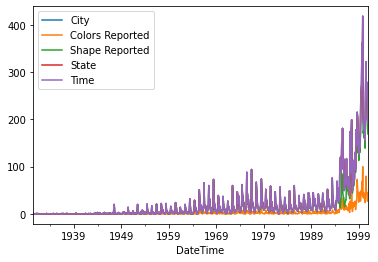

In [73]:
# 日付時刻型をもつインデックスに対しては，resampleによって指定した時間幅で集約できる．
# 以下では月次に集約し，その件数を計算し，プロットしている．

ufo.resample("M").count().plot();
# ufo.resample("Month").count().plot();

In [74]:
# 問題19（ufo）
# 未確認飛行物体のデータufoに対して，日付時刻列 DateTime から年を抽出した列　Year を生成せよ． （ヒント：日付時刻型のから年を計算するには，dt.yearとすればよい．）

In [75]:
# 問題20
# 未確認飛行物体のデータufoに対して，日付時刻列 DateTime から曜日を抽出した列 WeekDay を生成せよ． （ヒント：日付時刻型のから曜日を求めるにはdt.weekdayとすればよい．）

In [76]:
# 問題21
# 未確認飛行物体のデータufoに対して，2000年以降のデータだけを抽出せよ．

#データフレームの生成法(自分でデータフレームを作成)

In [77]:
# 生成方法
# 1,辞書
# 2,リスト
# 3,Numpy配列

# ここでは，他のPythonオブジェクトからデータフレームやシリーズを生成する方法について述べる．
# 最も簡単なのは，辞書から生成する方法である．辞書のキーが列名：リストとして与えた値が行になる．

D = {'name':['Pikacyu', 'Mickey', 'Kitty'], 'color':['Yellow', 'Black', 'White']}
pd.DataFrame(D) #引数にDaFrameにしたいオブジェクト

,name,color
0,Pikacyu,Yellow
1,Mickey,Black
2,Kitty,White


In [78]:
# リストのリスト（入れ子のリスト）として与えることもできるが，列名は別途columnsで与える必要がある．

L = [['Pikacyu', 'Yellow'],['Mickey', 'Black'],['Kitty', 'White']]
pd.DataFrame(L, columns=['name','color'])

,name,color
0,Pikacyu,Yellow
1,Mickey,Black
2,Kitty,White


In [79]:
# NumPyの配列からもデータフレームを生成できる．
# 例として2つのサイコロを5回づつ振ったときの目をランダムに生成した配列に代入し，そこからデータフレームを生成する．

Dice = np.random.randint(1,7, size=(5,2)) # 引数の（low, high）はhighを含まないことに注意,5行2列の配列
dicedf = pd.DataFrame(Dice, columns=['dice1', 'dice2'])
dicedf

,dice1,dice2
0,1,5
1,1,6
2,6,2
3,5,4
4,4,2


In [80]:
# 同様に，コインを5回投げたときの表裏を0,1で表した配列を生成する．
Coin = np.random.randint(0,2, size=(5,2)) # 引数の（low, high）はhighを含まないことに注意
coindf = pd.DataFrame(Coin, columns=['coin1', 'coin2'] )
coindf

,coin1,coin2
0,1,0
1,0,0
2,1,0
3,0,0
4,1,0


In [81]:
# 2つのデータフレームをconcatを用いて合体させる．列方向で合併したいので，axis=1と設定する．

pd.concat([dicedf, coindf], axis=1)

,dice1,dice2,coin1,coin2
0,1,5,1,0
1,1,6,0,0
2,6,2,1,0
3,5,4,0,0
4,4,2,1,0


#データフレームの結合

In [82]:
# mergeを用いて2つのデータフレームの結合ができる．
# 例として，おもちゃを持っている子供たちと，ぬいぐるみを持っている子供たちのデータフレームを生成する．
# mergeでは，どの列（結合キー）を用いて結合するかを引数onを使って指定できる

# このとき，どちらのデータフレームの結合キーを使うかは，引数howで指定する．
# howは 'left', 'right', 'outer', 'inner'から選択し，それぞれ左，右，和集合，共通部分を使って結合する．

# pd.merge(左側のデータ(例:df1),右側のデータ(例:df2),on="(何をキーにしてmergeするのか)",how="レンズのどこを持ってくるか(例:inner,outer,left)")

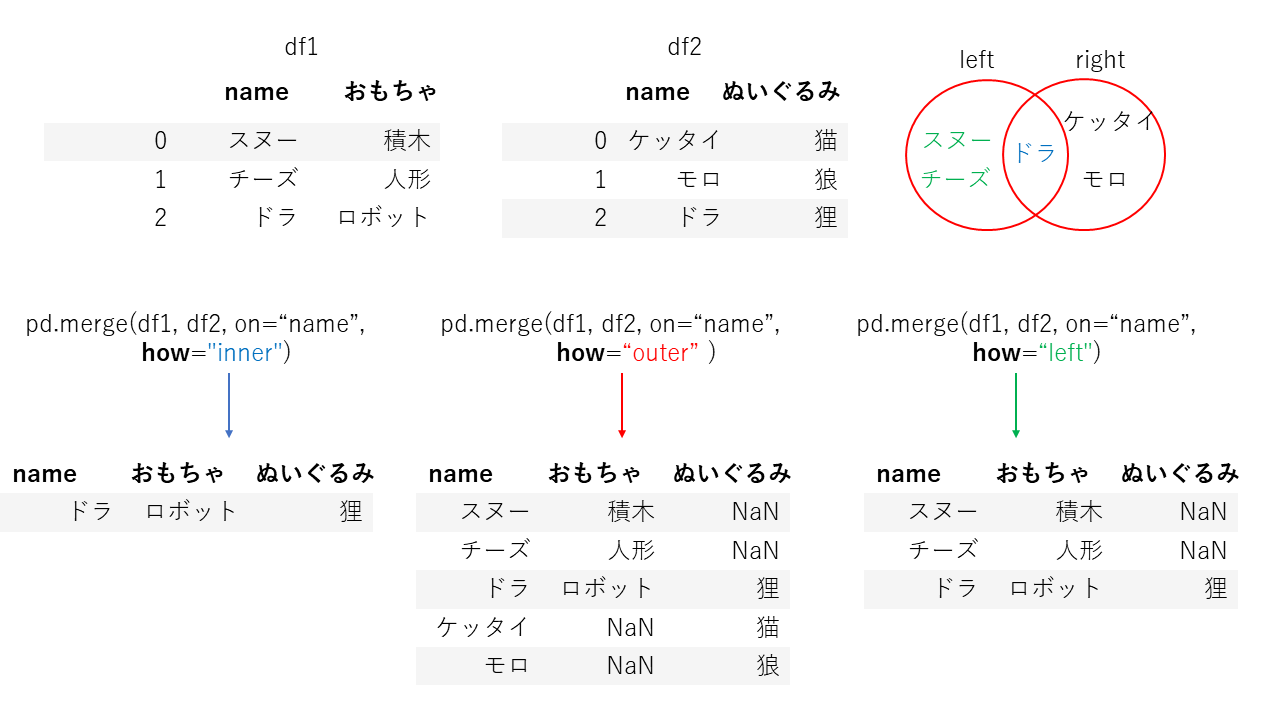

In [83]:
D1 = {'name':['スヌー', 'チーズ', 'ドラ'], 'おもちゃ':['積木', '人形', 'ロボット']}
D2 = {'name':['ケッタイ', 'モロ', 'ドラ'], 'ぬいぐるみ':['猫', '狼', '狸']}
df1 = pd.DataFrame(D1)
df2 = pd.DataFrame(D2)
df1

,name,おもちゃ
0,スヌー,積木
1,チーズ,人形
2,ドラ,ロボット


In [84]:
df2

,name,ぬいぐるみ
0,ケッタイ,猫
1,モロ,狼
2,ドラ,狸


In [85]:
pd.merge(df1, df2, on="name", how="inner") #内側(inner)

,name,おもちゃ,ぬいぐるみ
0,ドラ,ロボット,狸


In [86]:
pd.merge(df1, df2, on="name", how="outer") #全部(outer)

,name,おもちゃ,ぬいぐるみ
0,スヌー,積木,NaN
1,チーズ,人形,NaN
2,ドラ,ロボット,狸
3,ケッタイ,NaN,猫
4,モロ,NaN,狼


In [87]:
pd.merge(df1, df2, on="name", how="left") #左(left)

,name,おもちゃ,ぬいぐるみ
0,スヌー,積木,NaN
1,チーズ,人形,NaN
2,ドラ,ロボット,狸


#ピボットテーブル

In [88]:
# ビデオゲームのセールスデータ"http://logopt.com/data/vgsales.csv" をピボットテーブルを用いて集計する．
# pandasのpivot_table関数は，引数としてデータフレーム，集計する値(values)，行（index），列(columns），集計関数(aggfunc)を与えると，ピボットテーブルを返す．
                                                            
# 例としてビデオゲームのデータに対して，行を年('Year')，列をジャンル('Genre')とし，世界中での売り上げ('Global_Sales')を合計（'sum')したピボットテーブルを生成する．
# 集計の方法は引数aggfuncで与える．既定値はNumPyのmean（平均）である．

sales = pd.read_csv("http://logopt.com/data/vgsales.csv")
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [89]:
pivot = pd.pivot_table(sales, values="Global_Sales",index="Year", columns="Genre", aggfunc="sum")
# pivot = pd.pivot_table(データフレームそのもの, values="集計したいもの",index="行側(index)に持ってきたいもの", columns="列側(columns)にしたいもの", aggfunc="集計方法")
pivot.head() # ピボットテーブル自身がデータフレームオブジェクトなので，最初の5行だけ表示するにはheadメソッドが使える．

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,0.34,NaN,0.77,2.71,NaN,NaN,NaN,NaN,7.07,NaN,0.49,NaN
1981.0,14.84,NaN,NaN,NaN,6.93,2.24,0.48,NaN,10.04,0.45,0.79,NaN
1982.0,6.52,NaN,NaN,0.87,5.03,10.03,1.57,NaN,3.79,NaN,1.05,NaN
1983.0,2.86,0.4,NaN,2.14,6.93,0.78,NaN,NaN,0.48,NaN,3.20,NaN
1984.0,1.85,NaN,NaN,1.45,0.69,3.14,5.95,NaN,31.10,NaN,6.18,NaN


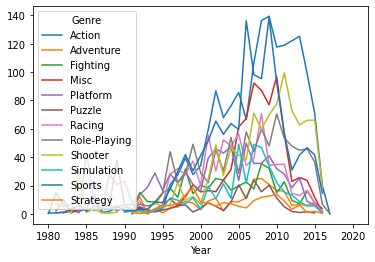

In [90]:
pivot.plot(); #ピボットテーブル自身がデータフレームオブジェクトなので，plot(線グラフ)メソッドで描画もできる．

In [91]:
df = pd.read_csv("http://logopt.com/data/class.csv")
df

,クラス名,性別,名前,身長,体重
0,猫組,女,ケッタイ,10,6
1,猫組,男,ドラ,130,130
2,猫組,男,ニャンコ,50,12
3,犬組,女,モロ,300,220
4,犬組,男,スヌー,35,10
5,犬組,男,チーズ,30,15
6,犬組,男,パトラッシュ,90,90


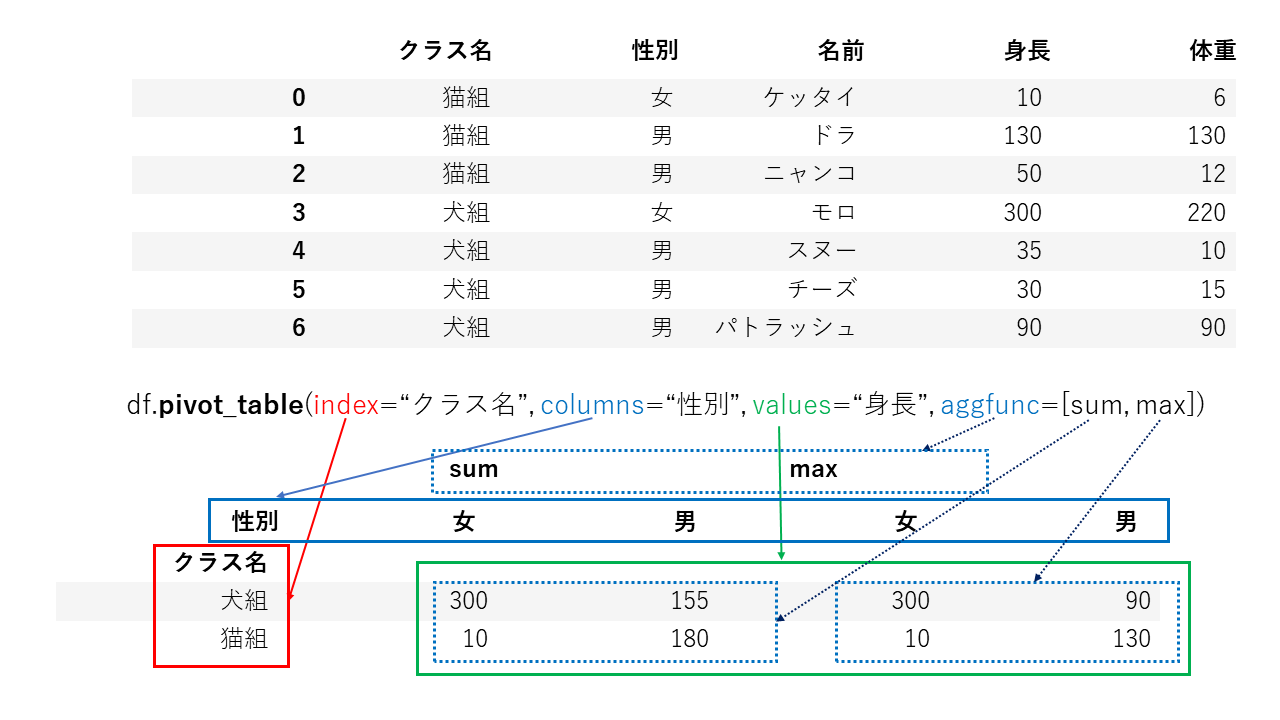

In [92]:
df.pivot_table(index="クラス名",columns="性別",values="身長", aggfunc=[sum,max])

sum       max     
性別      女    男    女    男
クラス名                    
犬組    300  155  300   90
猫組     10  180   10  130

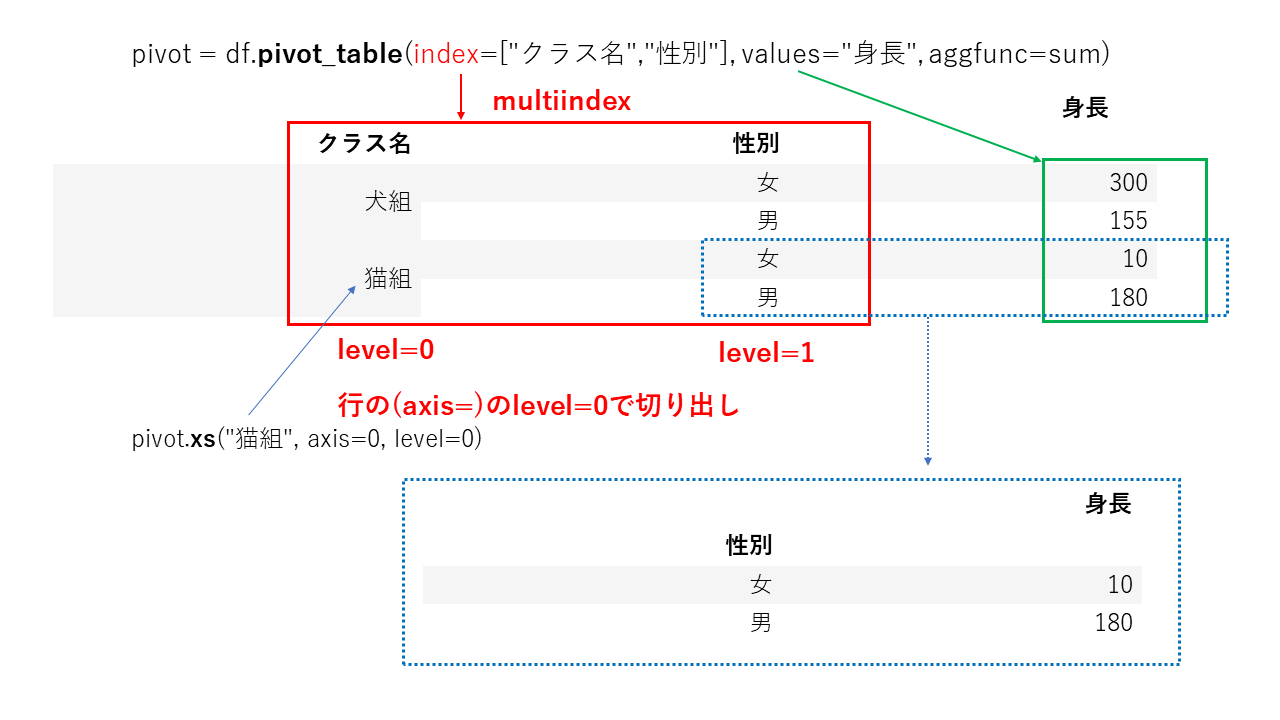

In [93]:
pivot = df.pivot_table(index=["クラス名","性別"],values="身長", aggfunc=sum)
pivot

身長
クラス名 性別     
犬組   女   300
     男   155
猫組   女    10
     男   180

In [94]:
pivot.xs("猫組", axis=0, level=0)
# pivot.xs("index", axis=0 or 1, level=0)

,身長
性別,
女,10
男,180


In [95]:
# 問題22（ポケモン）
# ポケモンデータ http://logopt.com/data/Pokemon.csv" に対して，メインタイプ（'Type 1')の世代('Generation')別の攻撃力（'Attack'）と守備力（'Defense'）の平均を集計せよ．
# （ヒント：pivot_tableで，集計値に複数の値を設定するには，引数valuesにデータフレームの列名をリストとして与える．）

poke = pd.read_csv("http://logopt.com/data/Pokemon.csv",index_col=0)
poke.pivot_table(index="Type 1",values=["Generation","Attack","Defense"],aggfunc=sum)

,Attack,Defense,Generation
Type 1,,,
Bug,4897,4880,222
Dark,2740,2177,125
Dragon,3588,2764,124
Electric,3040,2917,144
Fairy,1046,1117,70
Fighting,2613,1780,91
Fire,4408,3524,167
Flying,315,265,22
Ghost,2361,2598,134


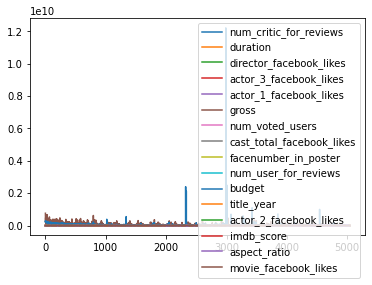

In [96]:
# 問題23（映画）
# 映画のデータ "http://logopt.com/data/movie_metadata.csv" に対して，主演俳優の列（'actor_1_name'）がジョニー・デップ（'Johnny Depp'）のものを抽出し，年度（'title_year'）別の予算（'budget'）と興行収入（'gross'）を線グラフで表示せよ．
# (ヒント：行には年度を，列には何も指定しないでピボットテーブルを生成し，plotメソッドでグラフを生成する．)

movie = pd.read_csv("http://logopt.com/data/movie_metadata.csv")
movie.pivot_table(index=["title_year",],values=['budget','gross'])
movie.plot() 

#forループによる反復処理

In [97]:
# Pandasでは、できるだけ反復処理はしない方が高速に処理ができるが、反復処理をした方が簡単にプログラムが書けることもある。 
# 大規模なデータを扱うのでなければ、多少の処理時間はかかっても、コードを書く時間を短縮した方が良い場合が多い。 
# ここでは、そのような場合に用いる反復処理の方法について学ぶ。

# データフレームにfor文を用いて反復を行う最も簡単で効率的な方法は、itertuplesメソッドを用いる方法であり、 このように記述する。

# for 行 in データフレーム.itertuples():
#     反復の中身
#     （行は列名を属性とした名前付きタプル）

In [98]:
# 映画のデータ "http://logopt.com/data/movie_metadata.csv" を用いた、以下の例題を考える。
# あなたは最近観た面白い映画の名前をど忘れした。確か、タイトルに"Super"が入っていた低予算映画だったと思うのだが、 そのディレクターを無性に知りたくなった。

# どうやって検索すれば良いだろうか？
# itertuplesを用いた反復を使って、タイトルに"Super"が入っていて、予算が100000以下のものを検索する。

movie = pd.read_csv("http://logopt.com/data/movie_metadata.csv")

for row in movie.itertuples(): #rowに各行の名前付きタプルが入っている(itertuples)
    if "Super" in row.movie_title and row.budget <=100000: #row.movie_title - 各行のムービーのタイトル, row.budget - 各行のムービーの予算
        print(row.movie_title, row.director_name)

Super Size Me  Morgan Spurlock
All Superheroes Must Die  Jason Trost


In [99]:
# そうだ、映画のタイトルは "Super Size Me" だった。ディレクターも無事に判明した。
# 今度は、多少高速な方法で検索してみよう。これは、必要な列だけを切り出してきて、それをzip関数で合わせたものを作成して反復を行う。

for title, budget, director in zip(movie.movie_title, movie.budget, movie.director_name): #in zip関数はデータを結合する
    if "Super" in title and budget <=100000: 
        print(title, director)

# 同じ結果が得られた。いずれの方法でも良いが、itertuplesを用いた方が簡単で可読性も良い。 
# 一方。列の切り出しとzipを用いた方法は、列がたくさんあるときには高速になる。

Super Size Me  Morgan Spurlock
All Superheroes Must Die  Jason Trost


In [100]:
# 問題24（ポケモン）
# ポケモンデータ http://logopt.com/data/Pokemon.csv" に対して，伝説のポケモン（'Legendary'が真）で、攻撃力（'Attack'）が防御力（'Defense'）より小さく、攻撃力が 90 以下、速度（’Speed’）が 110 以上のものを探せ。

poke = pd.read_csv("http://logopt.com/data/Pokemon.csv",index_col=0)
poke.head()

# for i in poke.itertuples():
#     if poke[poke["Legendary"]] in i.Attack < i.Defense and i.Attack <= 90 and i.Speed >=110:
#         print(i.Name)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


#列名の変更

In [101]:
# データ処理の際に，列名を変更したいことがある． データフレームに対するrenameメソッドを使えば良い．
# rename(columns= キーを元の列名， 値を変更後の列名とした辞書 )

In [102]:
# 元のデータフレームに対して変更を適用するには，inplace引数をTrueにする（既定値はFalse)．
# 例として ufoデータを読み込み，Time列を"日付"に， Shape Reported列を"形"に変更する．

ufo = pd.read_csv('http://logopt.com/data/ufo.csv', index_col=0)
ufo.rename(columns={"Time":"日付","Shape Reported":"形"}, inplace=True)
ufo.head()

,City,Colors Reported,形,State,日付
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [103]:
# 問題25（ufo）
# 上のufoデータのState列を"州”に， Colors Reported列を”色"に変更せよ．　
ufo.rename(columns={"State":"州", "Colors Reported":"色"},inplace=True)
ufo.head()

,City,色,形,州,日付
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
